# Handwritten Character Recognition


In [13]:
import os
import cv2
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Define dataset path (Update if needed)
dataset_path = "/kaggle/input/hand-dataset"  # Ensure this path is correct
IMG_SIZE = 32  # Resize images to 32x32

# Create empty lists
images = []
labels = []
class_names = sorted(os.listdir(dataset_path))  # Ensure sorted order for label consistency

# Label mapping
LABEL_MAP = {name: idx for idx, name in enumerate(class_names)}

print(f"✅ Found {len(class_names)} classes: {class_names}")


✅ Found 62 classes: ['0', '1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '3', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '4', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '5', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '6', '60', '61', '7', '8', '9']


In [14]:
for class_name in tqdm(class_names, desc="Loading Images"):
    class_path = os.path.join(dataset_path, class_name)
    if not os.path.isdir(class_path):
        continue  # Skip non-folder files

    for img_name in os.listdir(class_path):
        img_path = os.path.join(class_path, img_name)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Convert to grayscale

        if img is None:
            print(f"⚠️ Warning: Unable to load {img_path}. Skipping...")
            continue  # Skip corrupt images

        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))  # Resize
        img = img / 255.0  # Normalize (0-1)
        
        images.append(img)
        labels.append(LABEL_MAP[class_name])  # Assign numerical label

# Convert lists to NumPy arrays
X = np.array(images).reshape(-1, IMG_SIZE, IMG_SIZE, 1)  # Reshape for CNN
y = to_categorical(np.array(labels), num_classes=len(class_names))  # One-hot encode labels

print(f"✅ Dataset Loaded: {X.shape}, Labels: {y.shape}")


Loading Images: 100%|██████████| 62/62 [00:24<00:00,  2.51it/s]

✅ Dataset Loaded: (3410, 32, 32, 1), Labels: (3410, 62)


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"✅ Training Set: {X_train.shape}, Testing Set: {X_test.shape}")


✅ Training Set: (2728, 32, 32, 1), Testing Set: (682, 32, 32, 1)


In [17]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam


In [18]:
# Define CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 1)),  # First Conv Layer
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),  # Second Conv Layer
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),  # Third Conv Layer
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),  # Prevent Overfitting
    Dense(62, activation='softmax')  # 62 Classes (0-9, A-Z, a-z)
])

# Compile Model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Summary
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 30, 30, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 4, 4, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 62)                  │          15,934 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 239,934 (937.24 KB)

 Trainable params: 239,934 (937.24 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=32)

# Save model
model.save("handwritten_characters_model.h5")
print("✅ Model training complete & saved!")


Epoch 1/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 8s 40ms/step - accuracy: 0.0147 - loss: 4.1347 - val_accuracy: 0.0308 - val_loss: 4.0934
Epoch 2/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0508 - loss: 3.9855 - val_accuracy: 0.2713 - val_loss: 3.0384
Epoch 3/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2163 - loss: 2.9609 - val_accuracy: 0.5015 - val_loss: 2.0295
Epoch 4/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3949 - loss: 2.1827 - val_accuracy: 0.5821 - val_loss: 1.4925
Epoch 5/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5187 - loss: 1.5921 - val_accuracy: 0.6701 - val_loss: 1.2087
Epoch 6/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5727 - loss: 1.3613 - val_accuracy: 0.6979 - val_loss: 1.0010
Epoch 7/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6401 - loss: 1.1830 - val_accuracy: 0.7111 - val_loss: 0.9729
Epoch 8/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6980 - loss: 0.9480 - val_accuracy: 0.7287 - val_loss

22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step


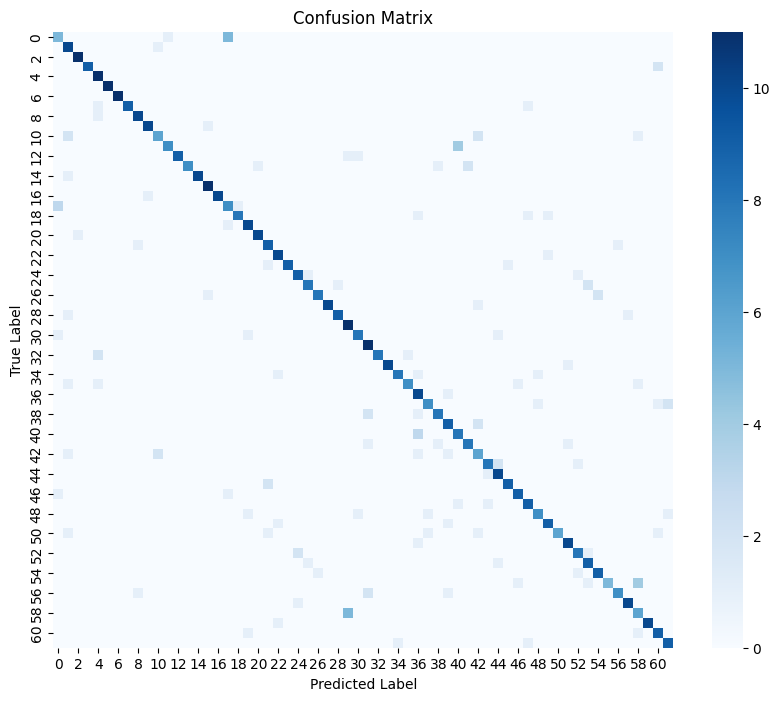

              precision    recall  f1-score   support

           0       0.50      0.45      0.48        11
           1       0.59      0.91      0.71        11
           2       0.92      1.00      0.96        11
           3       1.00      0.82      0.90        11
           4       0.69      1.00      0.81        11
           5       1.00      1.00      1.00        11
           6       1.00      1.00      1.00        11
           7       1.00      0.82      0.90        11
           8       0.83      0.91      0.87        11
           9       0.91      0.91      0.91        11
          10       0.67      0.55      0.60        11
          11       0.88      0.64      0.74        11
          12       1.00      0.82      0.90        11
          13       1.00      0.64      0.78        11
          14       1.00      0.91      0.95        11
          15       0.85      1.00      0.92        11
          16       1.00      0.91      0.95        11
          17       0.50    

In [20]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import seaborn as sns

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true_classes, y_pred_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=False, cmap="Blues", fmt="d")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

print(classification_report(y_true_classes, y_pred_classes))


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


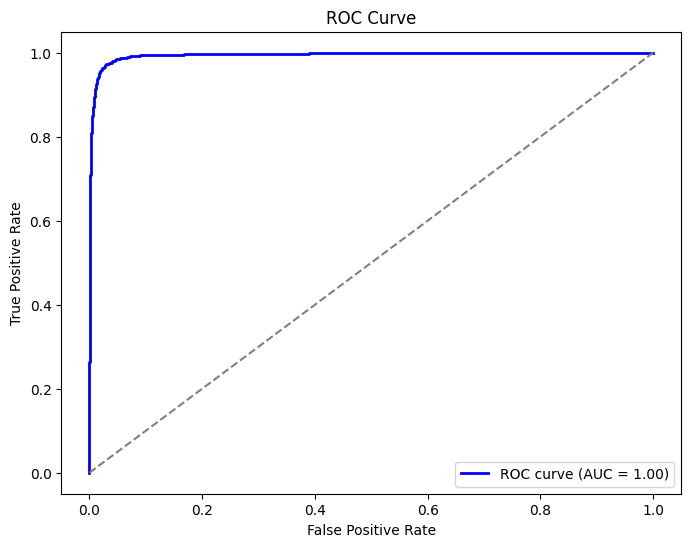

In [21]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_pred_probs = model.predict(X_test)
fpr, tpr, _ = roc_curve(y_test.ravel(), y_pred_probs.ravel())
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()


In [35]:
from tensorflow.keras.models import load_model
import cv2
import numpy as np

# Load the saved model
model = load_model("handwritten_character_model.h5")
print("✅ Model Loaded Successfully!")


✅ Model Loaded Successfully!


In [36]:
def preprocess_image(image_path):
    """
    Load and preprocess an image for prediction.
    """
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Load in grayscale
    img = cv2.resize(img, (32, 32))  # Resize to 32x32
    img = img / 255.0  # Normalize to [0,1]
    img = np.expand_dims(img, axis=-1)  # Add channel dimension
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    return img


In [37]:
def predict_character(image_path, class_labels):
    """
    Predict the handwritten character in the image.
    """
    img = preprocess_image(image_path)
    prediction = model.predict(img)
    predicted_class = np.argmax(prediction)
    confidence = np.max(prediction) * 100  # Convert to percentage
    
    print(f"🔍 Predicted Class: {class_labels[predicted_class]} ({confidence:.2f}% Confidence)")
    return class_labels[predicted_class]


In [39]:
# Define Class Labels (0-9, A-Z, a-z)
class_labels = [str(i) for i in range(10)] + [chr(i) for i in range(65, 91)] + [chr(i) for i in range(97, 123)]

# Predict a character
image_path = "/kaggle/input/hand-dataset/0/0_12.png"  # Provide an image path
predicted_character = predict_character(image_path, class_labels)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 381ms/step
🔍 Predicted Class: 0 (89.04% Confidence)
